In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'This run generated {len(cities)} cities')

This run generated 612 cities


In [42]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [54]:
# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []
record_count = 1

query_url = f"{url}appid={api_key}&units={units}&q="

print('Beginning Data Retrieval')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # trying to run API request for each city in cities array
    try:
        response = requests.get(query_url + city).json()
        print(f'Processing: {city} city number: {record_count}')
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        record_count += 1
        city_name.append(city)
    # if error i.e. city not found, skip that city and continue scan
    except:
        print('City not found. Skipping...')
        pass
    

print('Ending Data Retrieval')

Beginning Data Retrieval
Processing: marsa matruh city number: 1
Processing: neyveli city number: 2
Processing: rungata city number: 3
City not found. Skipping...
Processing: novaya lyalya city number: 3
Processing: atambua city number: 4
Processing: atuona city number: 5
Processing: mys shmidta city number: 6
City not found. Skipping...
Processing: batagay-alyta city number: 6
Processing: chihuahua city number: 7
Processing: cidreira city number: 8
Processing: petropavlovsk-kamchatskiy city number: 9
Processing: la ronge city number: 10
Processing: yellowknife city number: 11
Processing: porbandar city number: 12
Processing: provideniya city number: 13
Processing: leningradskiy city number: 14
Processing: avarua city number: 15
Processing: vaini city number: 16
Processing: concordia city number: 17
Processing: airai city number: 18
Processing: rikitea city number: 19
Processing: mataura city number: 20
Processing: carnarvon city number: 21
Processing: half moon bay city number: 22
Pro

Processing: krasnoselkup city number: 178
City not found. Skipping...
Processing: bratsk city number: 178
Processing: yuzhno-yeniseyskiy city number: 179
City not found. Skipping...
Processing: tucuma city number: 179
City not found. Skipping...
Processing: rio grande city number: 179
Processing: panaba city number: 180
Processing: ambanja city number: 181
Processing: fairbanks city number: 182
Processing: buraydah city number: 183
Processing: gwadar city number: 184
Processing: yalta city number: 185
Processing: mount isa city number: 186
Processing: nanakuli city number: 187
Processing: ondorhaan city number: 188
City not found. Skipping...
Processing: verkhnyaya toyma city number: 188
Processing: miandrivazo city number: 189
Processing: tumannyy city number: 190
City not found. Skipping...
Processing: rakoshyno city number: 190
Processing: lazaro cardenas city number: 191
Processing: nemuro city number: 192
Processing: gondanglegi city number: 193
Processing: osorno city number: 194

Processing: alta floresta city number: 342
Processing: zaterechnyy city number: 343
Processing: klaksvik city number: 344
Processing: atar city number: 345
Processing: tuy hoa city number: 346
Processing: bichena city number: 347
Processing: bargal city number: 348
City not found. Skipping...
Processing: ilam city number: 348
Processing: alofi city number: 349
Processing: ler city number: 350
Processing: la romana city number: 351
Processing: san quintin city number: 352
Processing: burns lake city number: 353
Processing: san angelo city number: 354
Processing: bacuit city number: 355
City not found. Skipping...
Processing: storforshei city number: 355
Processing: markova city number: 356
Processing: asyut city number: 357
Processing: marialva city number: 358
Processing: youghal city number: 359
Processing: esna city number: 360
Processing: aykhal city number: 361
Processing: curuca city number: 362
Processing: auki city number: 363
Processing: saint-augustin city number: 364
Processi

Processing: te anau city number: 530
Processing: semirom city number: 531
Processing: pavlodar city number: 532
Processing: xam nua city number: 533
Processing: sayansk city number: 534
Processing: maralal city number: 535
Processing: omboue city number: 536
Processing: arsenyev city number: 537
Processing: rawannawi city number: 538
City not found. Skipping...
Processing: pombia city number: 538
Processing: bideford city number: 539
Processing: maldonado city number: 540
Processing: dawei city number: 541
Processing: xining city number: 542
Processing: mandalgovi city number: 543
Processing: polunochnoye city number: 544
Processing: lopatyn city number: 545
Ending Data Retrieval


In [57]:
# create a data frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Lat": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,marsa matruh,EG,1572018225,31.35,27.25,0,72,74.80,21.03
1,neyveli,IN,1572018226,11.54,79.48,67,79,78.22,4.72
2,novaya lyalya,RU,1572018226,59.05,60.60,99,92,37.90,5.14
3,atambua,ID,1572018226,-9.11,124.89,100,83,71.35,4.29
4,atuona,PF,1572017632,-9.80,-139.03,14,70,78.94,8.41


In [58]:
# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv(output_data_file, index=False, header=True)

# Weather Graphs

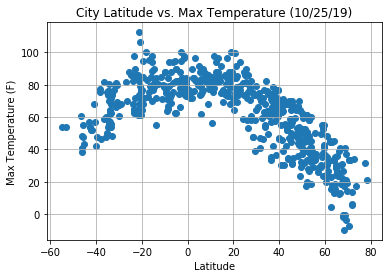

In [62]:
# Lat v Humidity plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/25/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVTemp.png")

# Show plot
plt.show()

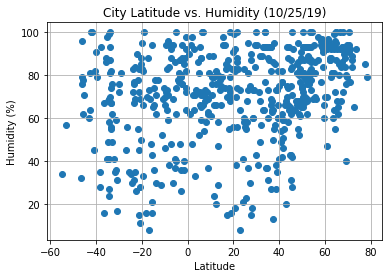

In [63]:
# Lat v Humidity plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/25/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVHum.png")

# Show plot
plt.show()

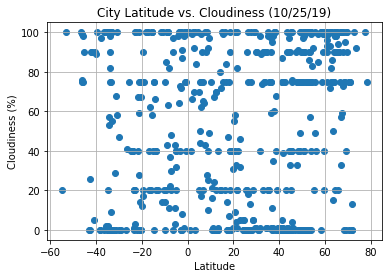

In [64]:
# Lat v Cloudiness plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/25/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVCloud.png")

# Show plot
plt.show()

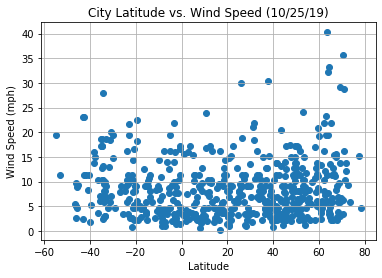

In [65]:
# Lat v Wind plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/25/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVWind.png")

# Show plot
plt.show()

# Observations

1. Temperatures in cities located near the equator (latitude = 0) do have a tendency to be higher than other cities that are farther away from the equator. Seeing as equatorial regions recieve the highest exposure to the Sun, this is not a surprise.
2. The other measures of weather, such as cloudiness, humidity, and wind speed, do not seem to be effected by proximity to equator. This could possibly be because these factors might tend to be more affected by proximity to water bodies rather than Sun exposure.
3. It is interesting to note that the highest temperature was not observed in one of the cities that are closest to the equator. This data set is only one snapshot of the entire year - it would be very interesting to see how these graphs change throughout the year and seasons.  